In [13]:
from preprocessing import *
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,10]

In [2]:
data = pd.read_csv("train_contrats_approx.csv")
data = preprocessing(data, balance=False, train_size=1.)[0]

C:\Users\User\Documents\GitHub\Projet_Option_Mazars\preprocessing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering["Classe_Age_Situ_Cont"]=data_clustering["Classe_Age_Situ_Cont"].apply(classe_age)
C:\Users\User\Documents\GitHub\Projet_Option_Mazars\preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering["franchise"]=data_clustering["franchise"].apply(franchise_)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3494: Sett

In [11]:
Y = data["Freq_sinistre"].values
X = data.drop("Freq_sinistre", axis=1, inplace=False).values

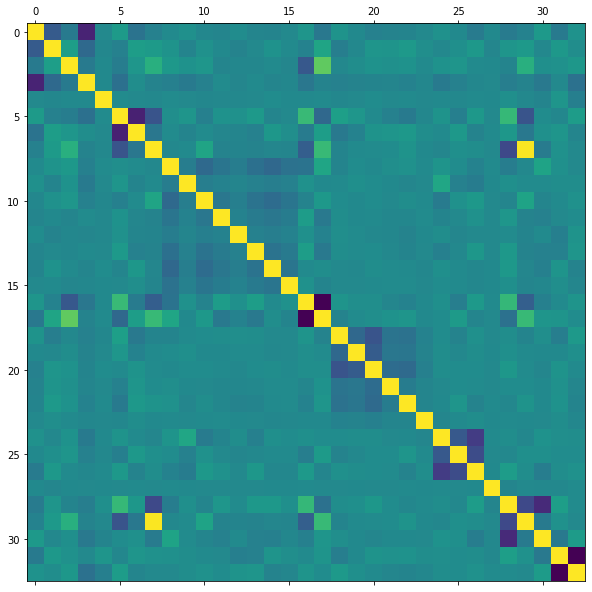

In [14]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())

In [12]:
data.corr()

,Classe_Age_Situ_Cont,franchise,Exposition_au_risque,ValeurPuissance,Freq_sinistre,Type_Apporteur_1,Type_Apporteur_2,Type_Apporteur_3,Activite_1,Activite_2,...,Zone_6,Fractionnement_A,Fractionnement_S,Fractionnement_T,FORMULE_2,FORMULE_3,FORMULE_4,FORMULE_5,Age_du_vehicule_<= 5 ans,Age_du_vehicule_> 5 ans
Classe_Age_Situ_Cont,1.000000,-0.352932,-0.113277,-0.705867,-0.003931,0.139860,-0.172924,-0.060883,0.012298,0.058270,...,-0.004870,0.060930,0.006617,-0.105923,0.007241,-0.105606,-0.058406,0.123583,-0.118887,0.073401
franchise,-0.352932,1.000000,0.170195,-0.248220,-0.017411,-0.064760,0.161255,0.137943,0.075138,-0.037873,...,0.041134,-0.011996,0.052392,0.113892,-0.027055,0.092447,0.133616,-0.011846,0.115177,0.037637
Exposition_au_risque,-0.113277,0.170195,1.000000,-0.119096,0.002688,-0.091955,0.098506,0.302429,0.112818,0.074321,...,0.014583,0.070867,0.094715,0.014191,0.002474,-0.042417,0.299873,0.048189,0.060002,0.106844
ValeurPuissance,-0.705867,-0.248220,-0.119096,1.000000,0.003445,-0.196523,0.030764,-0.043813,-0.072776,-0.115886,...,-0.019583,-0.123925,-0.061504,-0.016056,-0.003112,-0.081503,-0.045564,-0.129735,-0.003934,-0.186670
Freq_sinistre,-0.003931,-0.017411,0.002688,0.003445,1.000000,0.018001,-0.001896,-0.009189,0.020650,-0.000667,...,-0.007418,0.002297,-0.006726,0.013914,0.005760,0.048804,-0.009679,-0.041573,0.089773,-0.078306
Type_Apporteur_1,0.139860,-0.064760,-0.091955,-0.196523,0.018001,1.000000,-0.723673,-0.403824,0.042509,0.096540,...,-0.019470,0.079751,-0.074223,0.116927,0.000529,0.372430,-0.399338,0.029589,-0.017764,0.150523
Type_Apporteur_2,-0.172924,0.161255,0.098506,0.030764,-0.001896,-0.723673,1.000000,-0.141178,0.016474,-0.040872,...,0.033753,0.008681,0.114398,-0.048869,0.012306,0.106768,-0.139130,0.057240,0.092908,-0.033873
Type_Apporteur_3,-0.060883,0.137943,0.302429,-0.043813,-0.009189,-0.403824,-0.141178,1.000000,-0.010753,0.014900,...,0.005870,-0.022490,0.049125,0.036235,-0.005253,-0.475986,0.989468,-0.103940,0.065145,-0.005936
Activite_1,0.012298,0.075138,0.112818,-0.072776,0.020650,0.042509,0.016474,-0.010753,1.000000,-0.095012,...,0.011010,0.082380,0.030284,-0.055421,0.011097,-0.094589,-0.010181,0.204252,0.054327,-0.004671
Activite_2,0.058270,-0.037873,0.074321,-0.115886,-0.000667,0.096540,-0.040872,0.014900,-0.095012,1.000000,...,0.000233,0.228268,-0.061686,-0.096016,0.001288,0.046959,0.020227,0.019425,0.032957,0.035416


In [14]:
import statsmodels.api as sm

In [15]:
model = sm.OLS(Y, X).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                              302.7
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:46:05   Log-Likelihood:                      3.1258e+05
No. Observations:               87228   AIC:                                 -6.251e+05
Df Residuals:                   87202   BIC:                                 -6.249e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0006      0.000      6.020      0.000       0.000       0.001
x2            -0.0016      0.000     -7.446      0.000      -0.002      -0.001
x3            -0.0003      0.001     -0.514      0.607      -0.002       0.001
x4             0.0009   9.54e-05      9.793      0.000       0.001       0.001
x5             0.0005      0.001      0.305      0.760      -0.002       0.003
x6            -0.0012      0.001     -0.827      0.408      -0.004       0.002
x7             0.0057      0.003      1.862      0.063      -0.000       0.012
x8             0.0033      0.000      7.701      0.000       0.002       0.004
x9         -7.812e-05      0.001     -0.093      0.926      -0.002       0.002
x10           -0.0010      0.000     -2.225      0.026      -0.002      -0.000
x11           -0.0011      0.001     -1.844      0.065      -0.002    6.99e-05
x12           -0.0009      0.001     -0.969      0.333      -0.003       0.001
x13            0.0002      0.001      0.442      0.658      -0.001       0.001
x14            0.0029      0.000      6.522      0.000       0.002       0.004
x15            0.0016      0.001      2.871      0.004       0.000       0.003
x16            0.0017      0.001      3.124      0.002       0.001       0.003
x17            0.0032      0.001      5.523      0.000       0.002       0.004
x18            0.0001      0.000      0.295      0.768      -0.001       0.001
x19            0.0011      0.000      2.295      0.022       0.000       0.002
x20            0.0030      0.000      6.921      0.000       0.002       0.004
x21           -0.0002      0.001     -0.327      0.744      -0.001       0.001
x22            0.0036      0.001      6.039      0.000       0.002       0.005
x23           -0.0028      0.002     -1.857      0.063      -0.006       0.000
x24            0.0013      0.000      3.025      0.002       0.000       0.002
x25            0.0010      0.000      2.149      0.032    8.49e-05       0.002
x26            0.0026      0.000      6.271      0.000       0.002       0.003
x27            0.0133      0.006      2.066      0.039       0.001       0.026
x28            0.0022      0.002      1.031      0.302      -0.002       0.006
x29           -0.0071      0.004     -1.891      0.059      -0.014       0.000
x30           -0.0035      0.002     -1.632      0.103      -0.008       0.001
x31            0.0069      0.001     12.676      0.000       0.006       0.008
x32           -0.0020      0.001     -3.767      0.000      -0.003      -0.001
==============================================================================
Omnibus:                   134118.585   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    